In [13]:
import numpy as np
import xarray as xr
import seaborn as sns
import matplotlib.pyplot as plt

from numpy import vectorize
from latex import set_size


plt.style.use("tex")
sns.set_palette("colorblind")

figdir = "../figures/"
datadir = "../data/"
R = np.sqrt(9.81*4000)/1e-4
h0 = 0.5

In [14]:
@vectorize
def analytic_h(x, midpoint):
    h0 = 0.5
    R = np.sqrt(9.81*500)/1e-4
    if x > midpoint:
        return h0*(-1 + np.exp(-x/R)) 
    else:
        return h0*(1 - np.exp(x/R))
@vectorize
def analytic_h_initial(x, midpoint):
    h0 = 0.5
    if x > midpoint:
        return h0
    else:
        return -h0
    
def analytic_v(x):
    f0 = 1e-4
    g = 9.81
    h0 = 0.5
    R = np.sqrt(g*500)/f0
    v = -g*h0/(f0*R)*np.exp(-abs(x)/R)
    return v

In [15]:
dataset_names = ["h_d1.nc", "v_d1.nc"]
datasets = {}
for name in dataset_names:
    dataset = xr.open_dataset(datadir + name)
    dataset["x"] = dataset["x"] - max(dataset["x"])/2
    datasets[name[0]] = dataset

print(datasets["h"])

<xarray.Dataset>
Dimensions:  (time: 161, x: 200, y: 200)
Coordinates:
  * x        (x) float64 -4.466e+06 -4.421e+06 ... 4.444e+06 4.489e+06
  * y        (y) float64 1.125e+04 3.375e+04 5.625e+04 ... 4.466e+06 4.489e+06
  * time     (time) float64 0.0 6.0 12.0 18.0 24.0 ... 942.0 948.0 954.0 960.0
Data variables:
    h        (time, y, x) float32 ...
Attributes:
    About:    Created by StVenant shallow water model. Laurent Brodeau, 2013


In [16]:
datasets_spec = dict.fromkeys(datasets.keys())
for key in datasets.keys():
    dataset = datasets[key]
    datasets_spec[key] = dataset.sel(time=max(dataset.time), y=max(dataset.y)/2, method="nearest")
print(datasets["v"])

<xarray.Dataset>
Dimensions:  (time: 161, x: 200, y: 201)
Coordinates:
  * x        (x) float64 -4.466e+06 -4.421e+06 ... 4.444e+06 4.489e+06
  * y        (y) float64 0.0 2.25e+04 4.5e+04 ... 4.455e+06 4.478e+06 4.5e+06
  * time     (time) float64 0.0 6.0 12.0 18.0 24.0 ... 942.0 948.0 954.0 960.0
Data variables:
    v        (time, y, x) float32 ...
Attributes:
    About:    Created by StVenant shallow water model. Laurent Brodeau, 2013


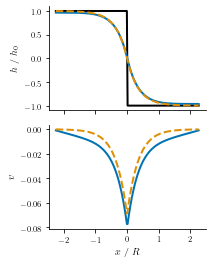

In [17]:
fig, ax = plt.subplots(2, 1, figsize=set_size(width=221, subplots=(2, 1)), sharex=True)
ax[0].plot(datasets_spec["h"].x/R, analytic_h_initial(datasets_spec["h"].h, 0)/h0,
           linewidth=2,
           color="black"
          )
ax[0].plot(datasets_spec["h"].x/R, datasets_spec["h"].h/h0,
        linewidth=2,
        #label="numerical"
       )
ax[0].plot(datasets_spec["h"].x/R, analytic_h(datasets_spec["h"].x, 0)/h0,
        linewidth=2,
        linestyle="dashed",
        #label="analytical"
       )
ax[0].set_ylabel(r"$h$ / $h_0$")

ax[1].plot(datasets_spec["v"].x/R, datasets_spec["v"].v, #/max(datasets_spec["v"].v),
        linewidth=2,
        #label="numerical"
       )
ax[1].plot(datasets_spec["v"].x/R, analytic_v(datasets_spec["v"].x), #/max(datasets_spec["v"].v),
        linewidth=2,
        linestyle="dashed",
        #label="analytical"
       )
ax[1].set_ylabel(r"$v$")
ax[1].set_xlabel(r"$x$ / $R$")

sns.despine(fig=fig)
fig.tight_layout()
#fig.savefig(figdir + "dynamics_comparison.pdf", format="pdf", bbox_inches="tight")

plt.show()

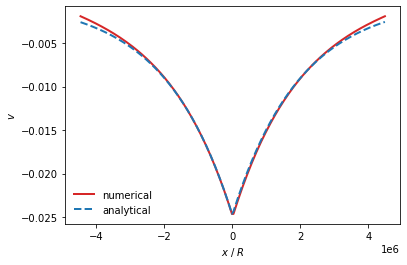